In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
file_path = 'Sep_21_2016.csv'
data = pd.read_csv(file_path)


print(data.shape)

(1298625, 12)


In [4]:
features = ['RH', 'MAX15', 'HR_2', 'HR_72', 'TD_HR', 'ELV', 'DTW', 'TWI']
target = 'w_depth'


data = data.dropna()


X = data[features]
y = data[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model.fit(X_train_scaled, y_train)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score

from tensorflow.keras.layers import Dropout

In [26]:
model = Sequential()
model.add(BatchNormalization(input_dim=X_train.shape[1]))

model.add(Dense(64, activation='relu',  kernel_regularizer=l2(0.02)))
model.add(BatchNormalization()) 
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu',  kernel_regularizer=l2(0.015)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#model.add(Dense(32, activation='relu', use_bias=False, kernel_regularizer=l2(0.015)))
#model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))


model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error', metrics=['mae'])


model.fit(X_train, y_train, batch_size=20000, epochs=100) 

Epoch 1/100
52/52 [==============================] - 5s 58ms/step - loss: 1.2646 - mae: 0.4145
Epoch 2/100
52/52 [==============================] - 3s 60ms/step - loss: 0.2697 - mae: 0.2006
Epoch 3/100
52/52 [==============================] - 3s 61ms/step - loss: 0.1113 - mae: 0.1397
Epoch 4/100
52/52 [==============================] - 3s 60ms/step - loss: 0.0701 - mae: 0.1163
Epoch 5/100
52/52 [==============================] - 3s 59ms/step - loss: 0.0534 - mae: 0.1065
Epoch 6/100
52/52 [==============================] - 3s 58ms/step - loss: 0.0449 - mae: 0.0985
Epoch 7/100
52/52 [==============================] - 3s 57ms/step - loss: 0.0435 - mae: 0.0979
Epoch 8/100
52/52 [==============================] - 3s 57ms/step - loss: 0.0421 - mae: 0.0974
Epoch 9/100
52/52 [==============================] - 3s 63ms/step - loss: 0.0422 - mae: 0.0977
Epoch 10/100
52/52 [==============================] - 3s 66ms/step - loss: 0.0421 - mae: 0.0978
Epoch 11/100
52/52 [=============================

KeyboardInterrupt: 

In [23]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

8117/8117 [==============================] - 9s 1ms/step


In [25]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'Training R^2: {train_r2}')
print(f'Testing R^2: {test_r2}')


Training RMSE: 0.2795869289651391
Testing RMSE: 0.2812473898353154
Training R^2: 0.26775571369842444
Testing R^2: 0.26798114176790444


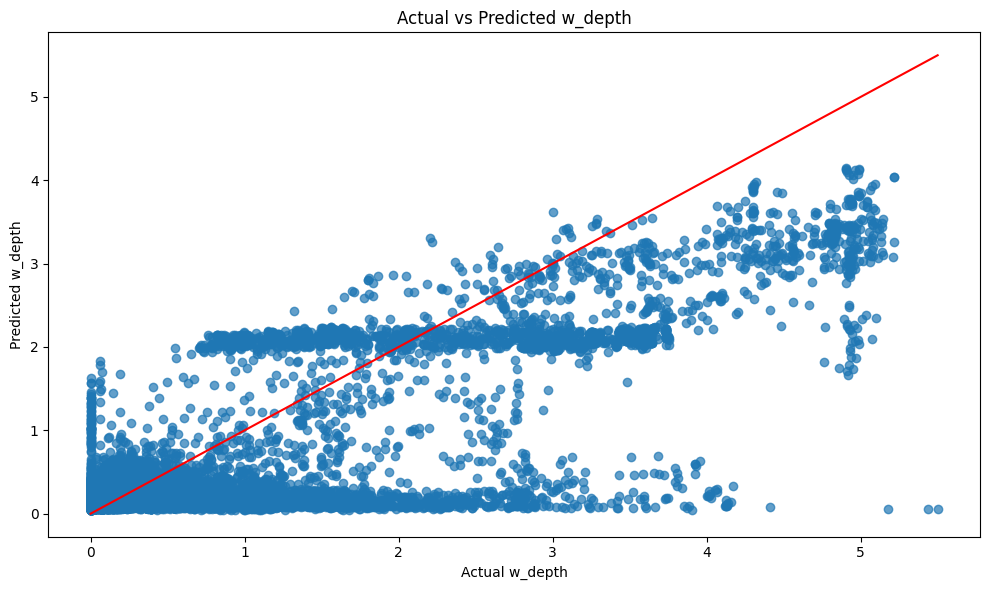

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.xlabel('Actual w_depth')
plt.ylabel('Predicted w_depth')
plt.title('Actual vs Predicted w_depth')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.tight_layout()
plt.show()

In [20]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 503. GiB for an array with shape (259725, 259725) and data type float64

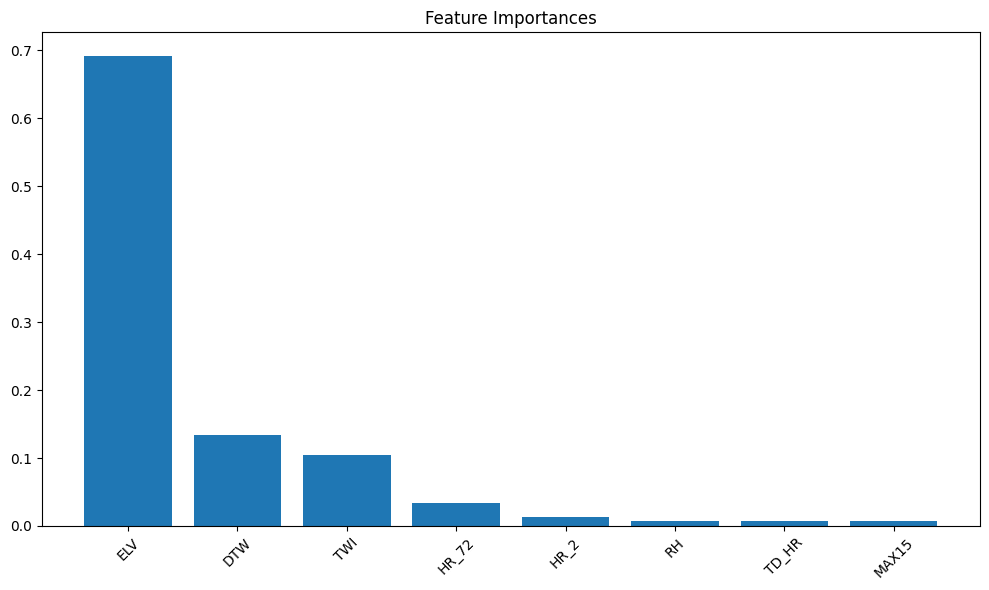

In [11]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()